In [63]:
import numpy as np

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [64]:
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=1, 
    n_redundant=0, 
    n_classes=2, 
    n_clusters_per_class=1, 
    random_state=41, 
    hypercube=False, 
    class_sep=20
)

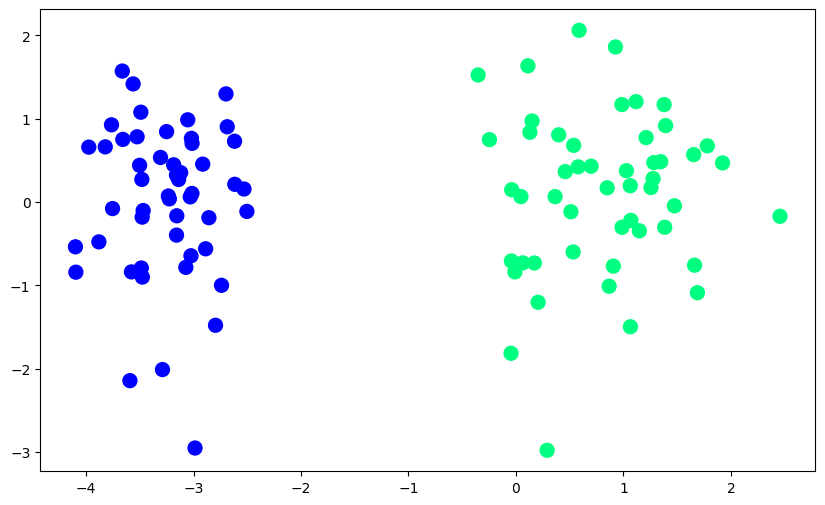

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [66]:
def step(num: float):
    if num <= 0:
        return 0

    return 1

In [67]:
def perceptron(X: np.array, y: np.array, epochs: int) -> tuple:
    X = np.insert(arr=X, obj=0, values=1, axis=1)

    weights = np.ones(X.shape[1])
    learning_rate = 0.1
    
    for i in range(epochs):
        idx = np.random.randint(0, X.shape[0])
        y_pred = step(np.dot(X[idx], weights))
        
        weights += learning_rate * (y[idx] - y_pred) * X[idx]

    return (weights[0], weights[1: ])

In [68]:
intercept, coef = perceptron(X, y, 1000) # ( W0, (w1, w2, w3.....) )

In [69]:
print(coef)
print(intercept)

[1.05343617 0.2221512 ]
1.3000000000000003


In [70]:
m = (coef[0]/coef[1])
b = (intercept/coef[1])

In [71]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

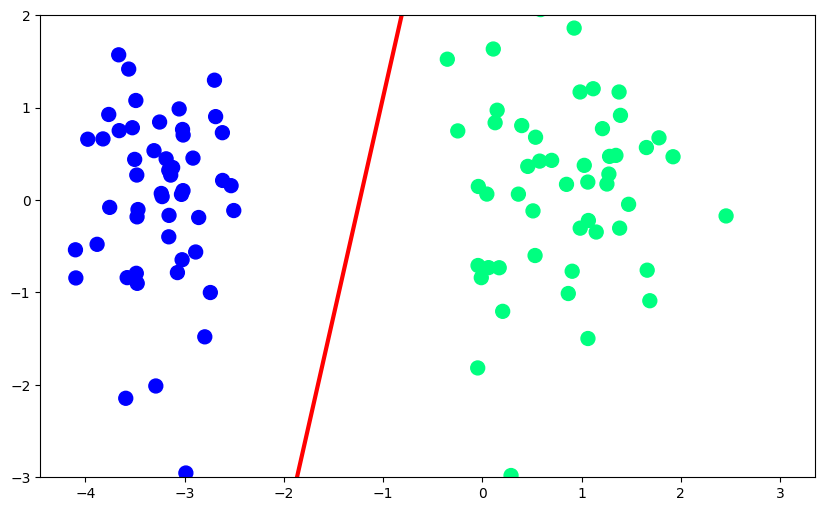

In [72]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [73]:
def perceptron_history(X: np.array, y: np.array, epochs: int) -> tuple:
    X = np.insert(arr=X, obj=0, values=1, axis=1)

    weights = np.ones(X.shape[1])
    learning_rate = 0.1

    m: list = []
    b: list = []
    
    for i in range(epochs):
        idx = np.random.randint(0, X.shape[0])
        y_pred = step(np.dot(X[idx], weights))

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
        weights += learning_rate * (y[idx] - y_pred) * X[idx]

    return m, b

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [76]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [77]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

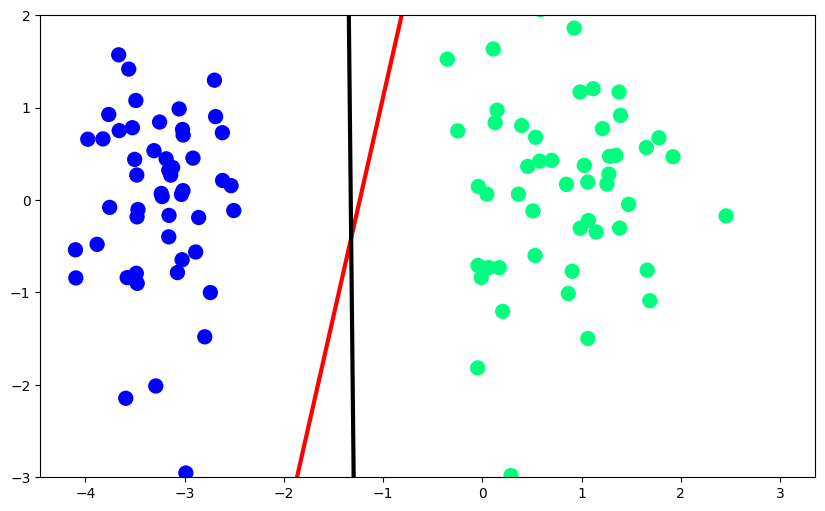

In [78]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [79]:
def sigf(x: int):
    return 1/(1 + np.exp(-1 * x))

In [80]:
def perceptron_sig(X: np.array, y: np.array, epochs: int) -> tuple:
    X = np.insert(arr=X, obj=0, values=1, axis=1)

    weights = np.ones(X.shape[1])
    learning_rate = 0.1
    
    for i in range(epochs):
        idx = np.random.randint(0, X.shape[0])
        y_pred = sigf(np.dot(X[idx], weights))
        
        weights += learning_rate * (y[idx] - y_pred) * X[idx]

    return (weights[0], weights[1: ])

In [81]:
intercept, coef = perceptron_sig(X, y, 1000) # ( W0, (w1, w2, w3.....) )

In [82]:
print(coef)
print(intercept)

[ 2.85712991 -0.03084421]
2.8218055436146017


In [83]:
m = (coef[0]/coef[1])
b = (intercept/coef[1])

In [84]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

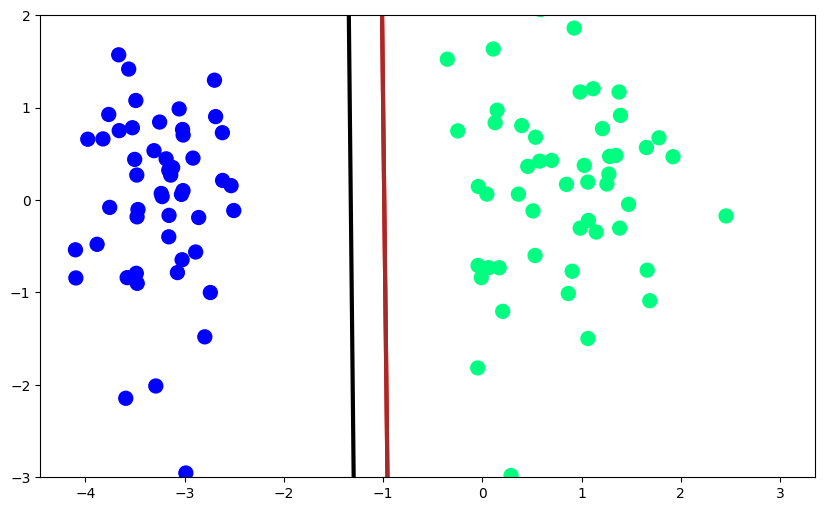

In [87]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
